In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\기상청 기상자료개방포털\종관기상관측\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\기상청 기상자료개방포털\\종관기상관측\\OBS_ASOS_DD_20230110131057.csv']

In [47]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,98,동두천,2018-01-01,-3.1,-9.5,809.0,4.6,1325.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98,동두천,2018-01-02,-3.5,-8.6,727.0,3.8,1415.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98,동두천,2018-01-03,-5.4,-9.5,815.0,1.1,1525.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98,동두천,2018-01-04,-6.1,-11.8,744.0,-0.6,1500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98,동두천,2018-01-05,-4.7,-8.5,751.0,2.9,1436.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   10956 non-null  int64  
 1   지점명                  10956 non-null  object 
 2   일시                   10956 non-null  object 
 3   평균기온(°C)             10947 non-null  float64
 4   최저기온(°C)             10954 non-null  float64
 5   최저기온 시각(hhmi)        10954 non-null  float64
 6   최고기온(°C)             10955 non-null  float64
 7   최고기온 시각(hhmi)        10955 non-null  float64
 8   강수 계속시간(hr)          1443 non-null   float64
 9   10분 최다 강수량(mm)       2659 non-null   float64
 10  10분 최다강수량 시각(hhmi)   1818 non-null   float64
 11  1시간 최다강수량(mm)        2661 non-null   float64
 12  1시간 최다 강수량 시각(hhmi)  1938 non-null   float64
 13  일강수량(mm)             3981 non-null   float64
 14  최대 순간 풍속(m/s)        10953 non-null  float64
 15  최대 순간 풍속 풍향(16방위)    10953 non-null 

In [8]:
df.describe()

,지점,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),...,평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
count,10956.000000,10947.000000,10954.000000,10954.000000,10955.000000,10955.000000,1443.000000,2659.000000,1818.000000,2661.000000,...,1821.000000,1824.000000,1824.000000,1824.000000,1825.000000,1825.000000,4394.000000,4394.000000,1424.000000,88.000000
mean,138.166667,12.367644,7.348932,875.481012,18.214286,1393.097490,6.142183,2.127905,1083.488449,5.243968,...,14.541516,14.873904,15.190954,15.785143,15.919507,15.761041,2.570437,3.672258,9.411166,2.548864
std,46.014478,10.568951,11.154102,732.134586,10.469587,308.455945,14.006154,3.479700,875.589814,8.796681,...,9.332085,8.896883,7.507282,6.449283,3.753566,1.928815,1.515351,2.164412,21.178882,2.427660
min,98.000000,-17.100000,-23.500000,1.000000,-12.100000,1.000000,0.070000,0.000000,-2359.000000,0.000000,...,-1.000000,0.100000,2.600000,4.800000,10.000000,12.800000,0.200000,0.300000,0.000000,0.170000
25%,99.000000,4.000000,-1.500000,503.000000,9.700000,1349.000000,1.350000,0.100000,429.500000,0.200000,...,5.800000,6.500000,7.900000,9.500000,12.400000,13.800000,1.300000,1.900000,0.000000,0.897500
50%,113.500000,12.900000,7.200000,613.000000,19.600000,1444.000000,3.780000,0.700000,1133.500000,1.700000,...,15.200000,15.700000,15.700000,16.150000,15.600000,15.600000,2.200000,3.200000,1.300000,1.625000
75%,202.000000,21.700000,17.400000,744.000000,27.100000,1527.000000,9.000000,2.400000,1806.250000,6.200000,...,23.400000,23.300000,22.600000,21.900000,19.400000,17.600000,3.700000,5.300000,8.200000,3.245000
max,203.000000,33.700000,30.300000,2400.000000,40.100000,2400.000000,493.000000,27.700000,2356.000000,82.900000,...,30.200000,29.600000,27.200000,27.500000,25.200000,19.200000,7.600000,10.900000,265.300000,10.550000


In [9]:
df.describe(include=np.object)

,지점명,일시,기사
count,10956,10956,2625
unique,6,1826,2588
top,동두천,2018-01-01,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...
freq,1826,6,7


**각 년도의 월별 평균 기온은?**

**각 년도의 월별 최고기온과 최저기온은?**

**각 년도의 월별 강수량은?**

**각 년도의 월별 평균 일사량은?**

**각 년도의 월별 평균 풍속은?**

**각 년도의 월별 평균 상대습도는?**

**각 년도의 월별 평균 현지기압은?**

**각 년도의 월별 최심적설은?**

**지점별 평균 기온?**

**지점별 평균 강수량?**

## 전처리

In [20]:
df.isnull().sum()

지점                        0
지점명                       0
일시                        0
평균기온(°C)                  9
최저기온(°C)                  2
최저기온 시각(hhmi)             2
최고기온(°C)                  1
최고기온 시각(hhmi)             1
강수 계속시간(hr)            9513
10분 최다 강수량(mm)         8297
10분 최다강수량 시각(hhmi)     9138
1시간 최다강수량(mm)          8295
1시간 최다 강수량 시각(hhmi)    9018
일강수량(mm)               6975
최대 순간 풍속(m/s)             3
최대 순간 풍속 풍향(16방위)         3
최대 순간풍속 시각(hhmi)          3
최대 풍속(m/s)                0
최대 풍속 풍향(16방위)            0
최대 풍속 시각(hhmi)            0
평균 풍속(m/s)                6
풍정합(100m)                13
최다풍향(16방위)               11
평균 이슬점온도(°C)             18
최소 상대습도(%)                0
최소 상대습도 시각(hhmi)          0
평균 상대습도(%)               19
평균 증기압(hPa)              19
평균 현지기압(hPa)             12
최고 해면기압(hPa)              4
최고 해면기압 시각(hhmi)          4
최저 해면기압(hPa)              7
최저 해면기압 시각(hhmi)          4
평균 해면기압(hPa)             14
가조시간(hr)                  0
합계 일조시간(hr)         

In [55]:
df.drop('지점',axis=1,inplace=True)

In [25]:
temp_list = [c for c in df.columns if '°C' in c]
df[temp_list] = df[temp_list].fillna(-273)

In [37]:
df['10분 최다강수량 시각(hhmi)'] = df['10분 최다강수량 시각(hhmi)'].apply(lambda x : 0 if x < 0 else x)
df['1시간 최다 강수량 시각(hhmi)'] = df['1시간 최다 강수량 시각(hhmi)'].apply(lambda x : 0 if x < 0 else x)

In [38]:
df['기사'].fillna('None',inplace=True)

In [49]:
rain_list = [c for c in df.columns if '강수량(mm)' in c]
df[rain_list] = df[rain_list].fillna(-1)

In [51]:
df.fillna(0,inplace=True)

In [59]:
def convert_year(x):
    return datetime.strptime(x,'%Y-%m-%d').year

def convert_month(x):
    return datetime.strptime(x,'%Y-%m-%d').month

def convert_day(x):
    return datetime.strptime(x,'%Y-%m-%d').day

df['년도'] = df['일시'].apply(convert_year)
df['월'] = df['일시'].apply(convert_month)
df['일'] = df['일시'].apply(convert_day)

## 시각화

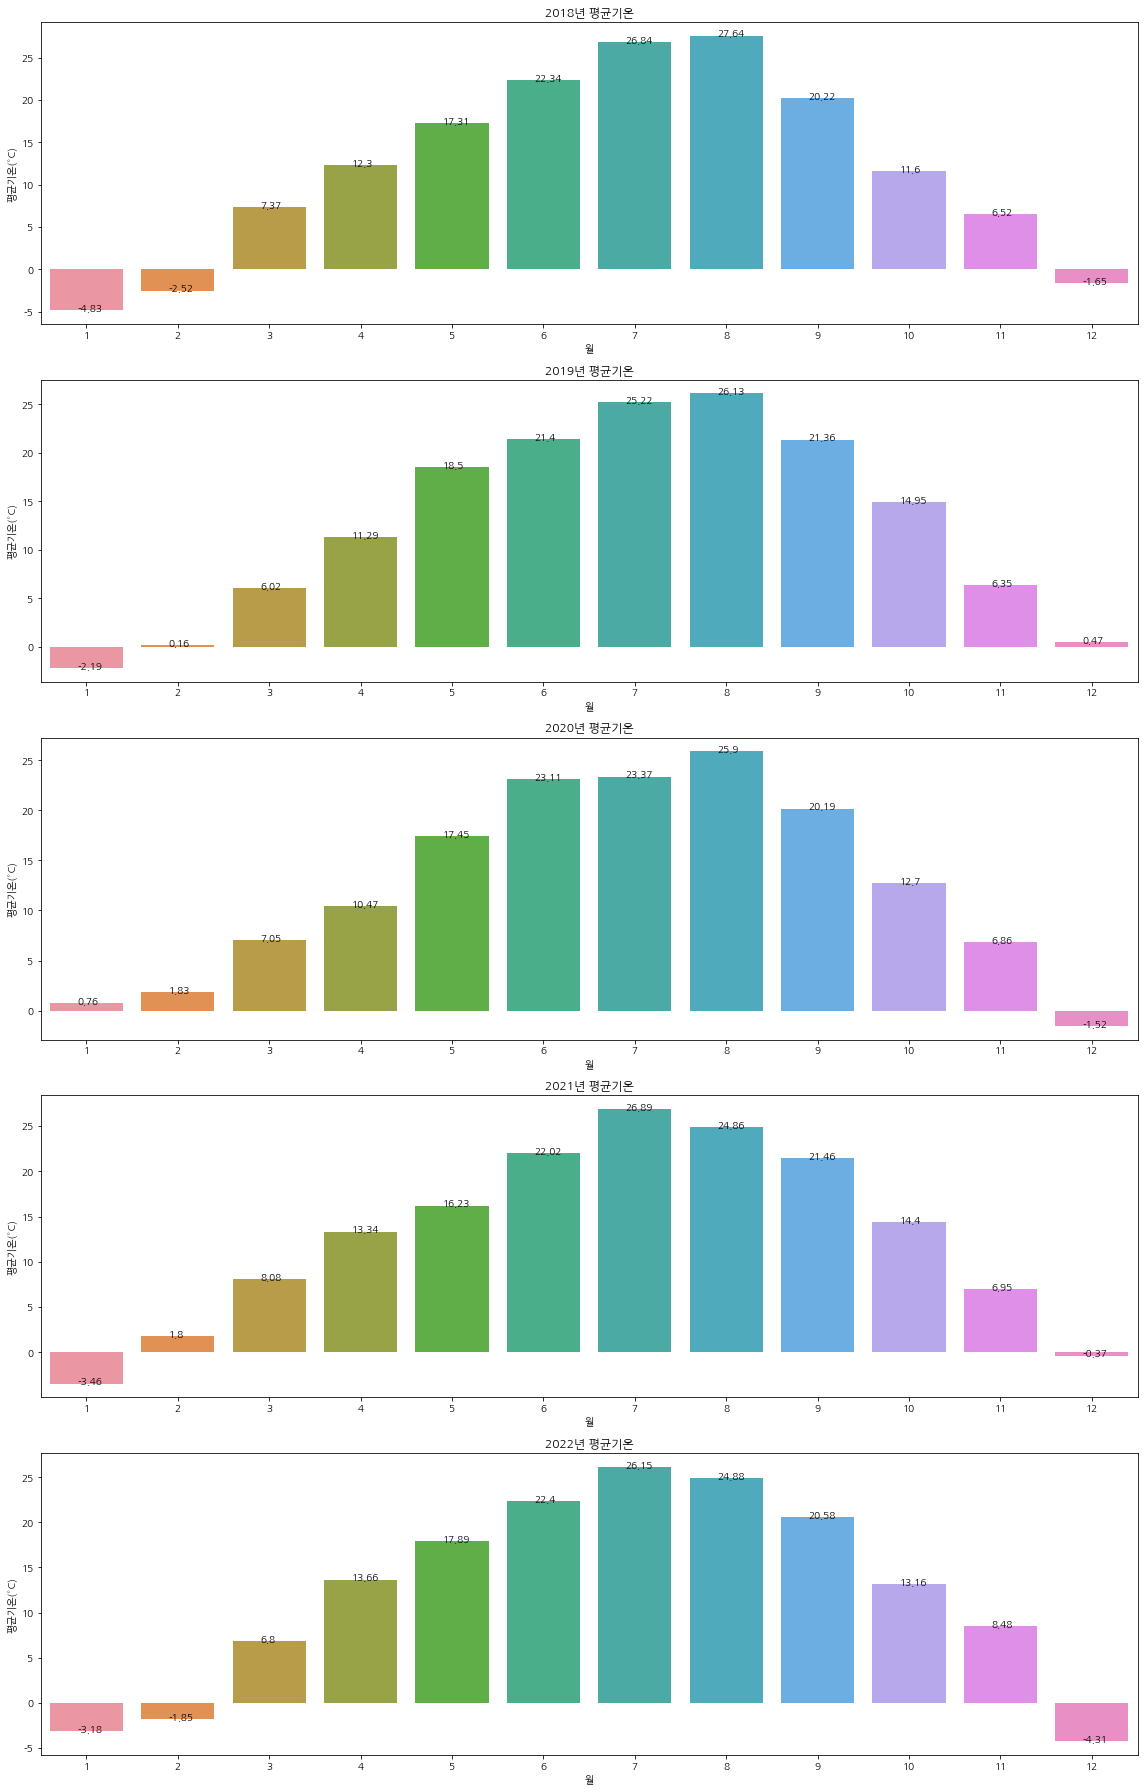

In [72]:
sub_df = df[df['평균기온(°C)']>-273].groupby(['년도','월'],as_index=False)['평균기온(°C)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25))
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균기온(°C)',ax=axes[i]).set(title=f'{y}년 평균기온')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균기온(°C)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

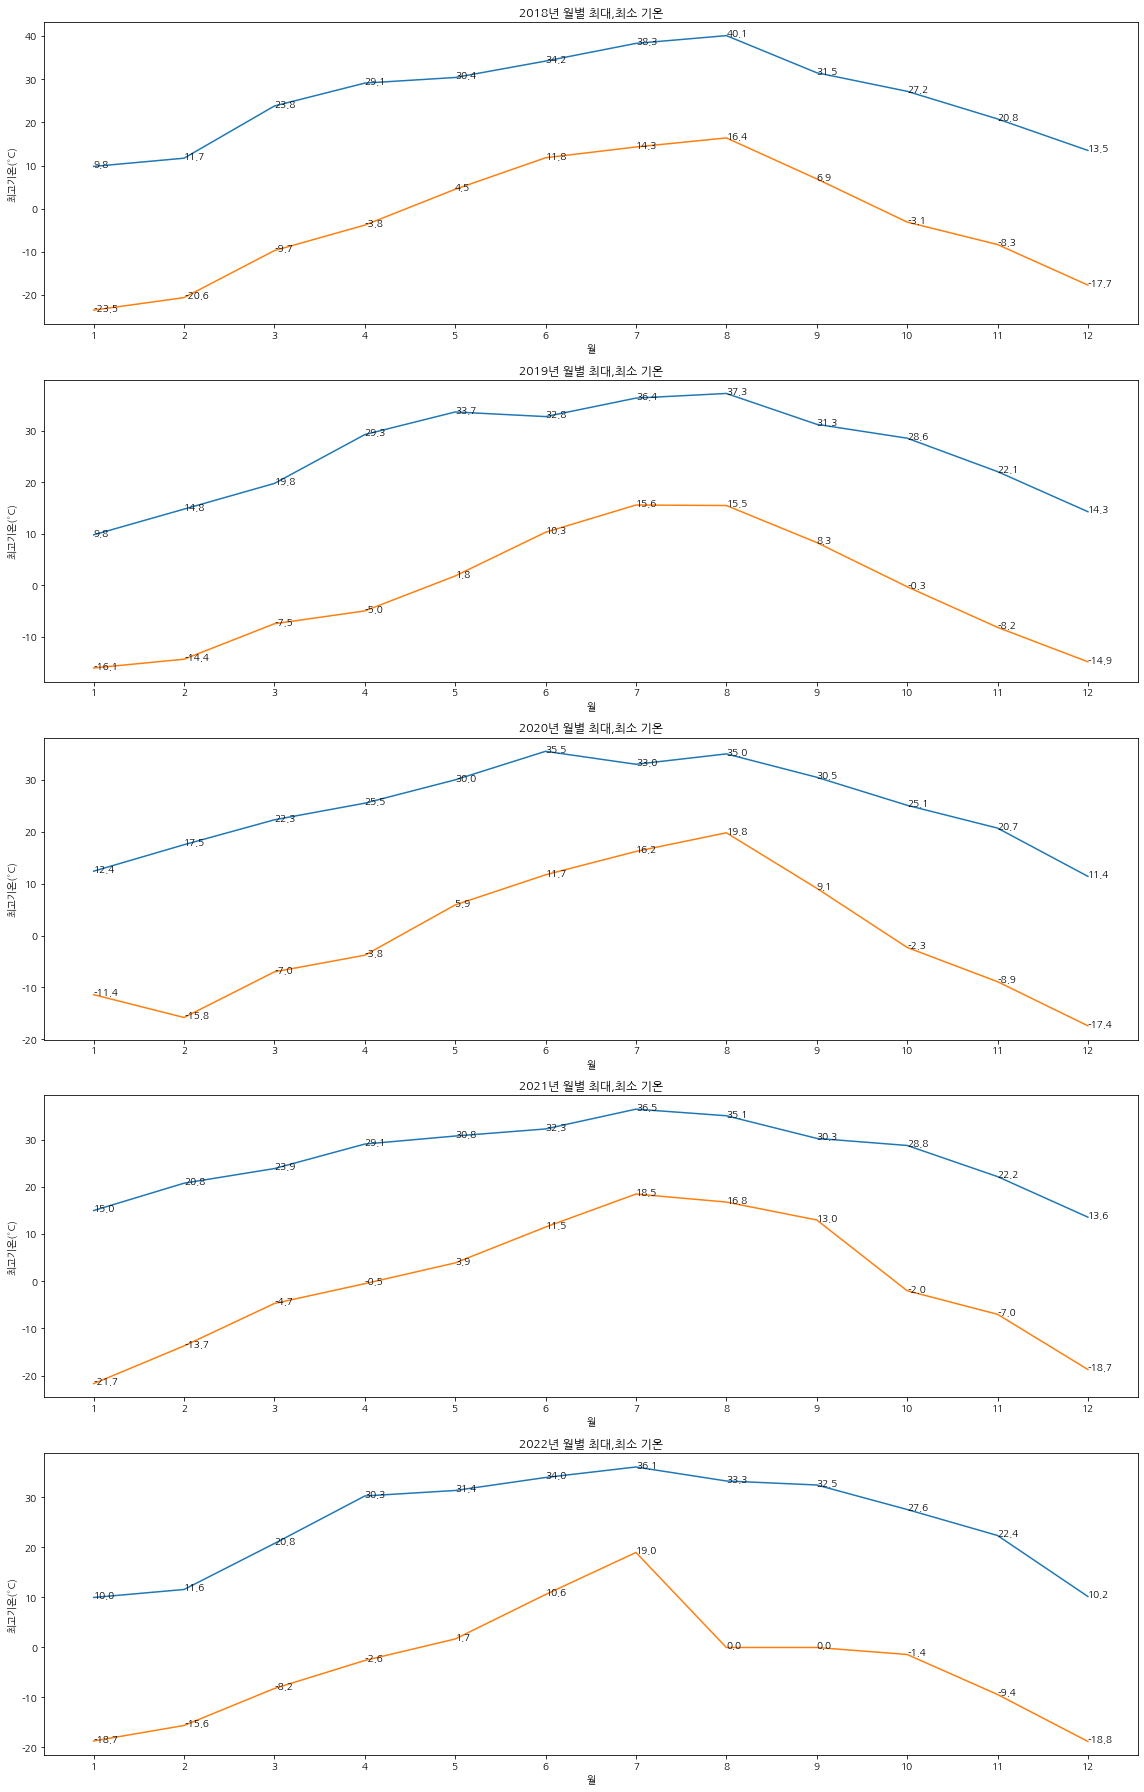

In [126]:
sub_df1 = df[df['최고기온(°C)']>-273].groupby(['년도','월'],as_index=False)['최고기온(°C)'].max()
sub_df2 = df[df['최저기온(°C)']>-273].groupby(['년도','월'],as_index=False)['최저기온(°C)'].min()
sub_df1 = sub_df1.astype({'월':'str'})
sub_df2 = sub_df2.astype({'월':'str'})

fig,axes = plt.subplots(5,1,figsize=(16,25))
y_list = df['년도'].unique()
m_list = [str(m) for m in range(1,13)]
for i,year in enumerate(y_list):
    sns.lineplot(data=sub_df1[sub_df1['년도']==year],x='월',y='최고기온(°C)',ax=axes[i])
    sns.lineplot(data=sub_df2[sub_df2['년도']==year],x='월',y='최저기온(°C)',ax=axes[i])
    axes[i].set_title(f'{year}년 월별 최대,최소 기온')
    for row1,row2 in zip(sub_df1[sub_df1['년도']==year].iterrows(),sub_df2[sub_df2['년도']==year].iterrows()):
        _,p_x1,p_y1 = row1[1]
        _,p_x2,p_y2 = row2[1]
        axes[i].text(p_x1,p_y1,f'{p_y1}')
        axes[i].text(p_x2,p_y2,f'{p_y2}')
plt.tight_layout()

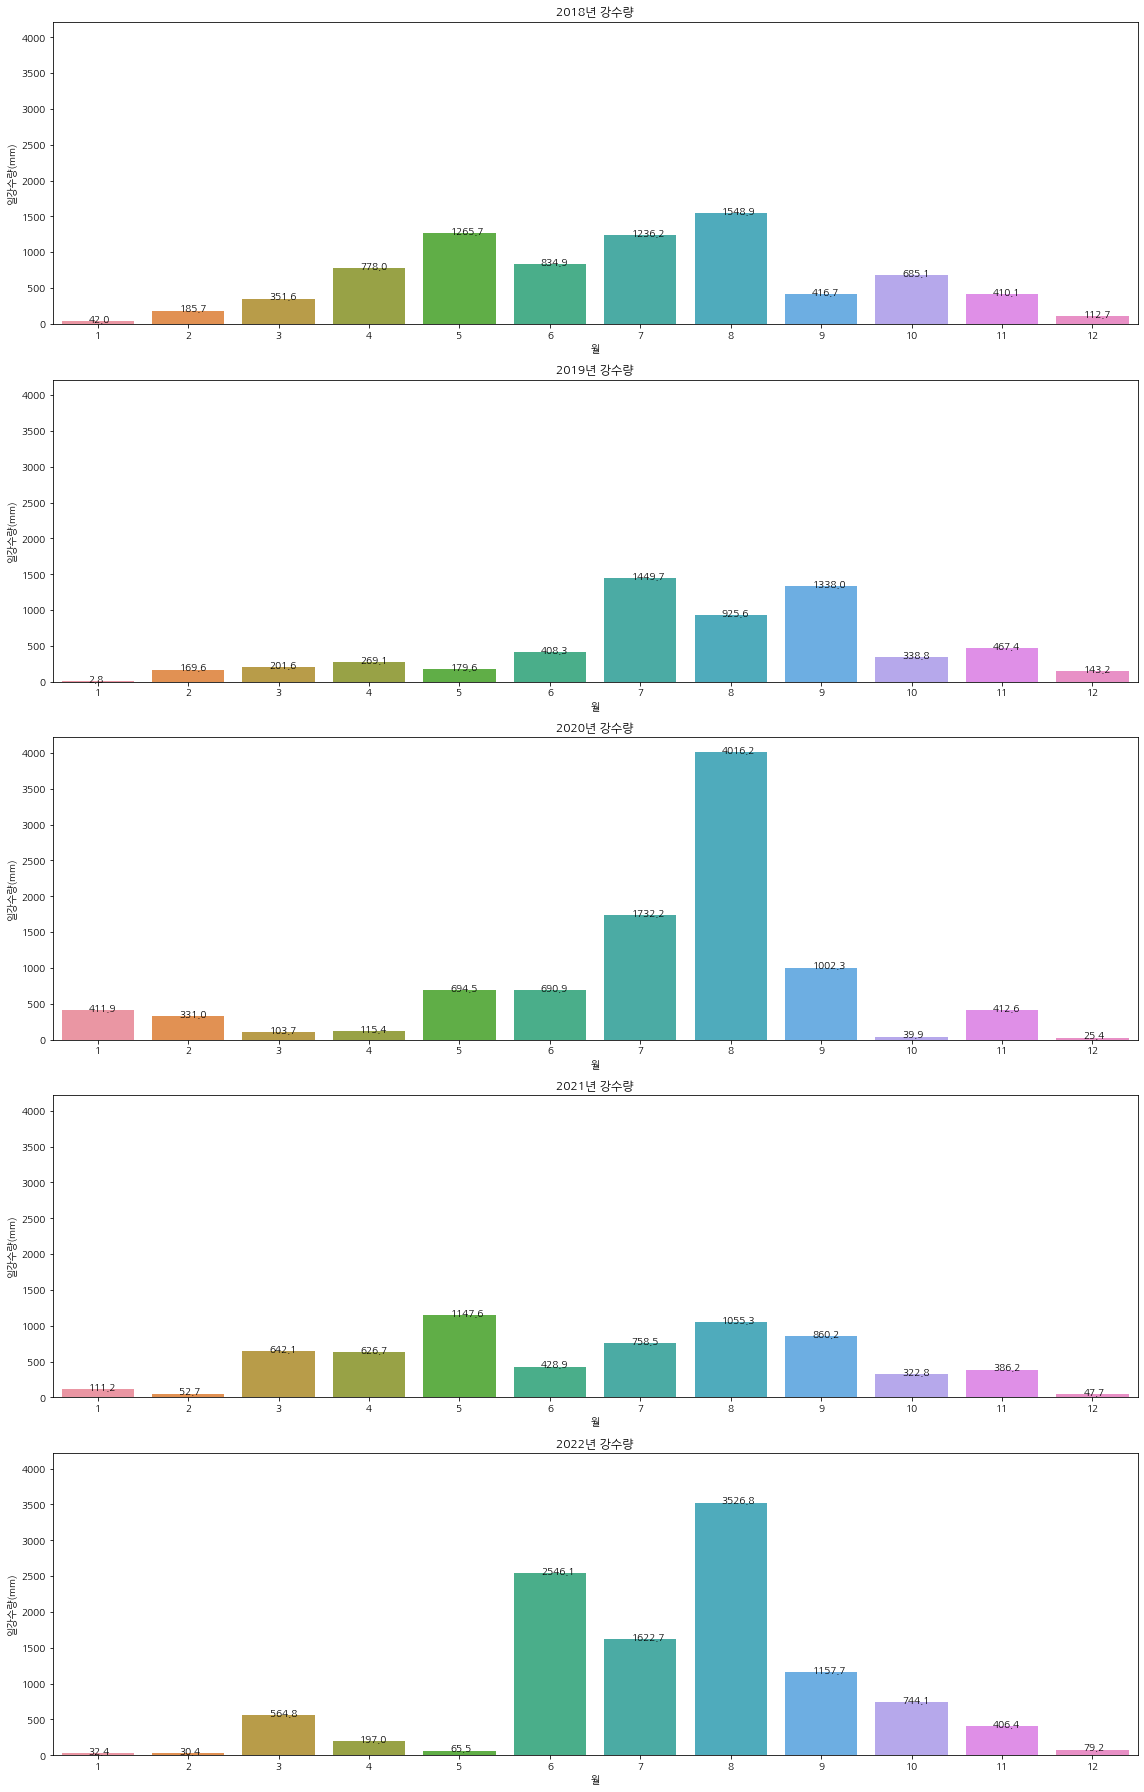

In [131]:
sub_df = df[df['일강수량(mm)']>-1].groupby(['년도','월'],as_index=False)['일강수량(mm)'].sum()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='일강수량(mm)',ax=axes[i]).set(title=f'{y}년 강수량')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['일강수량(mm)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

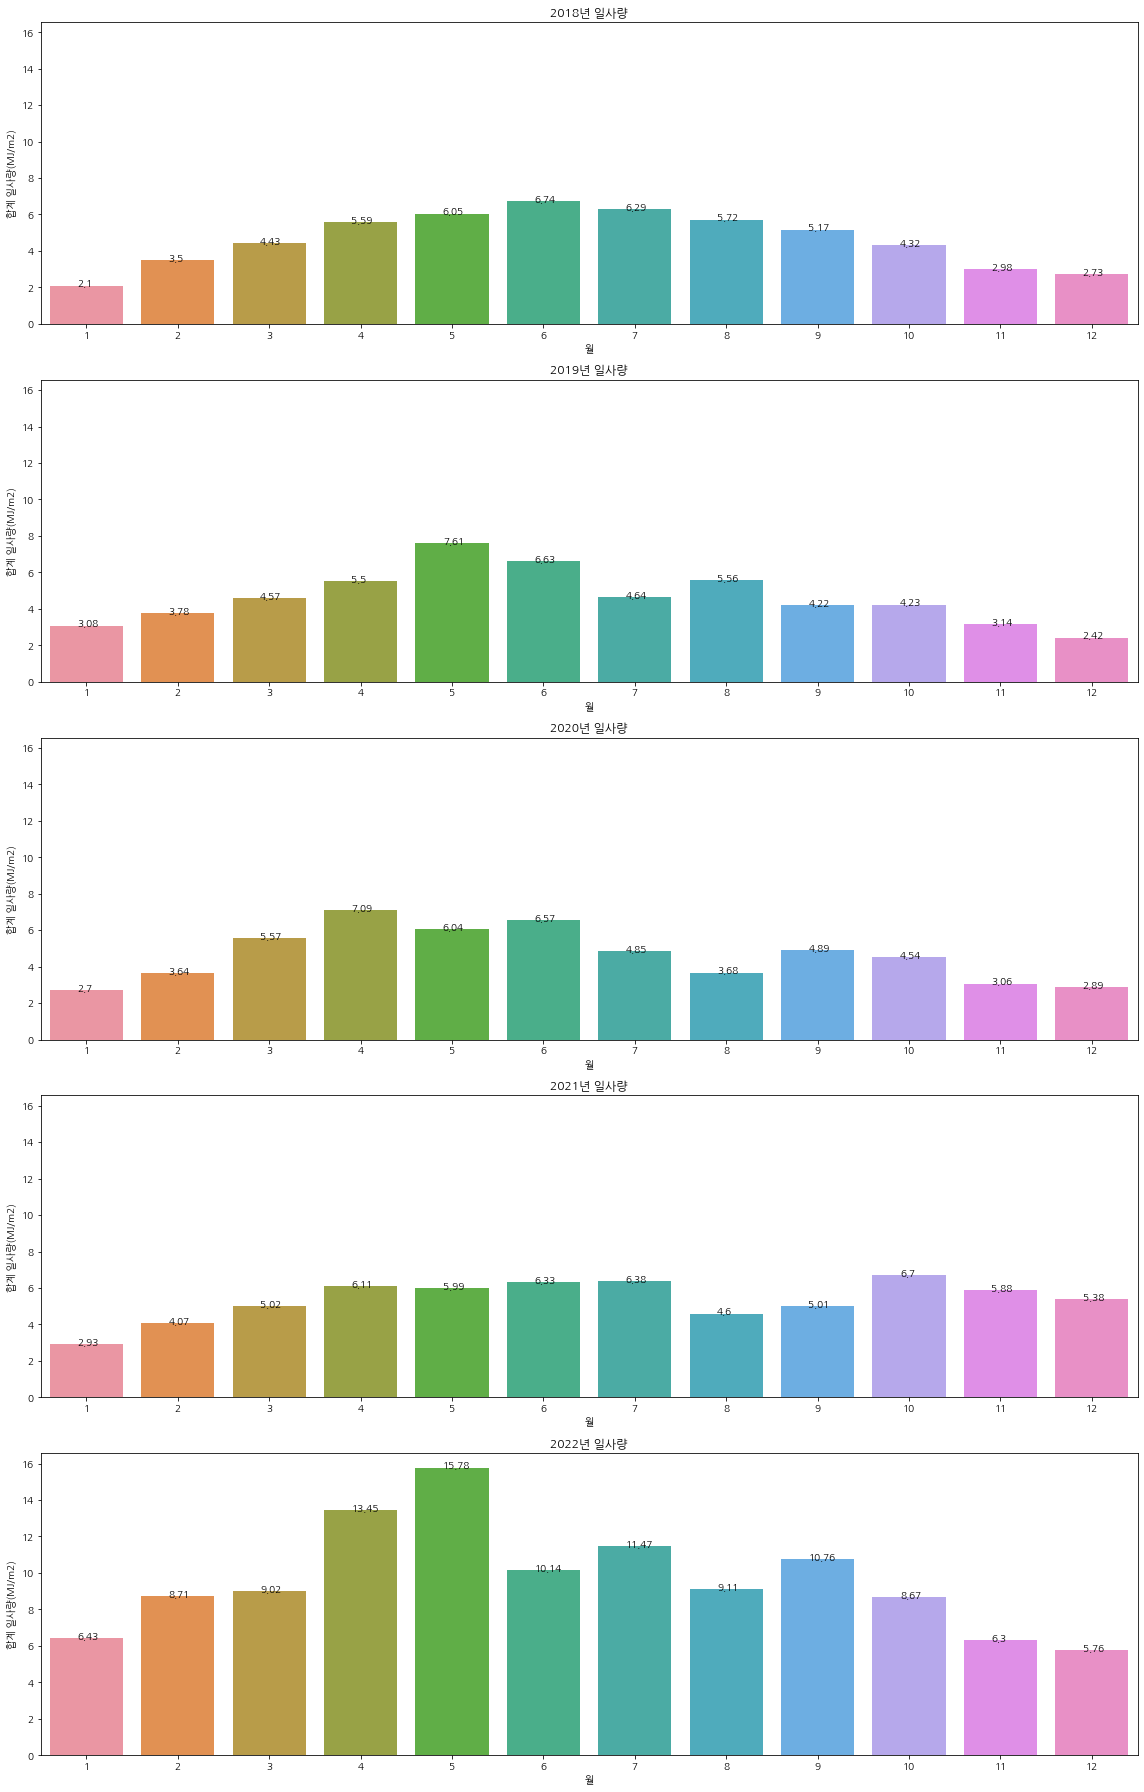

In [130]:
sub_df = df[df['합계 일사량(MJ/m2)']>-1].groupby(['년도','월'],as_index=False)['합계 일사량(MJ/m2)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='합계 일사량(MJ/m2)',ax=axes[i]).set(title=f'{y}년 일사량')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['합계 일사량(MJ/m2)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

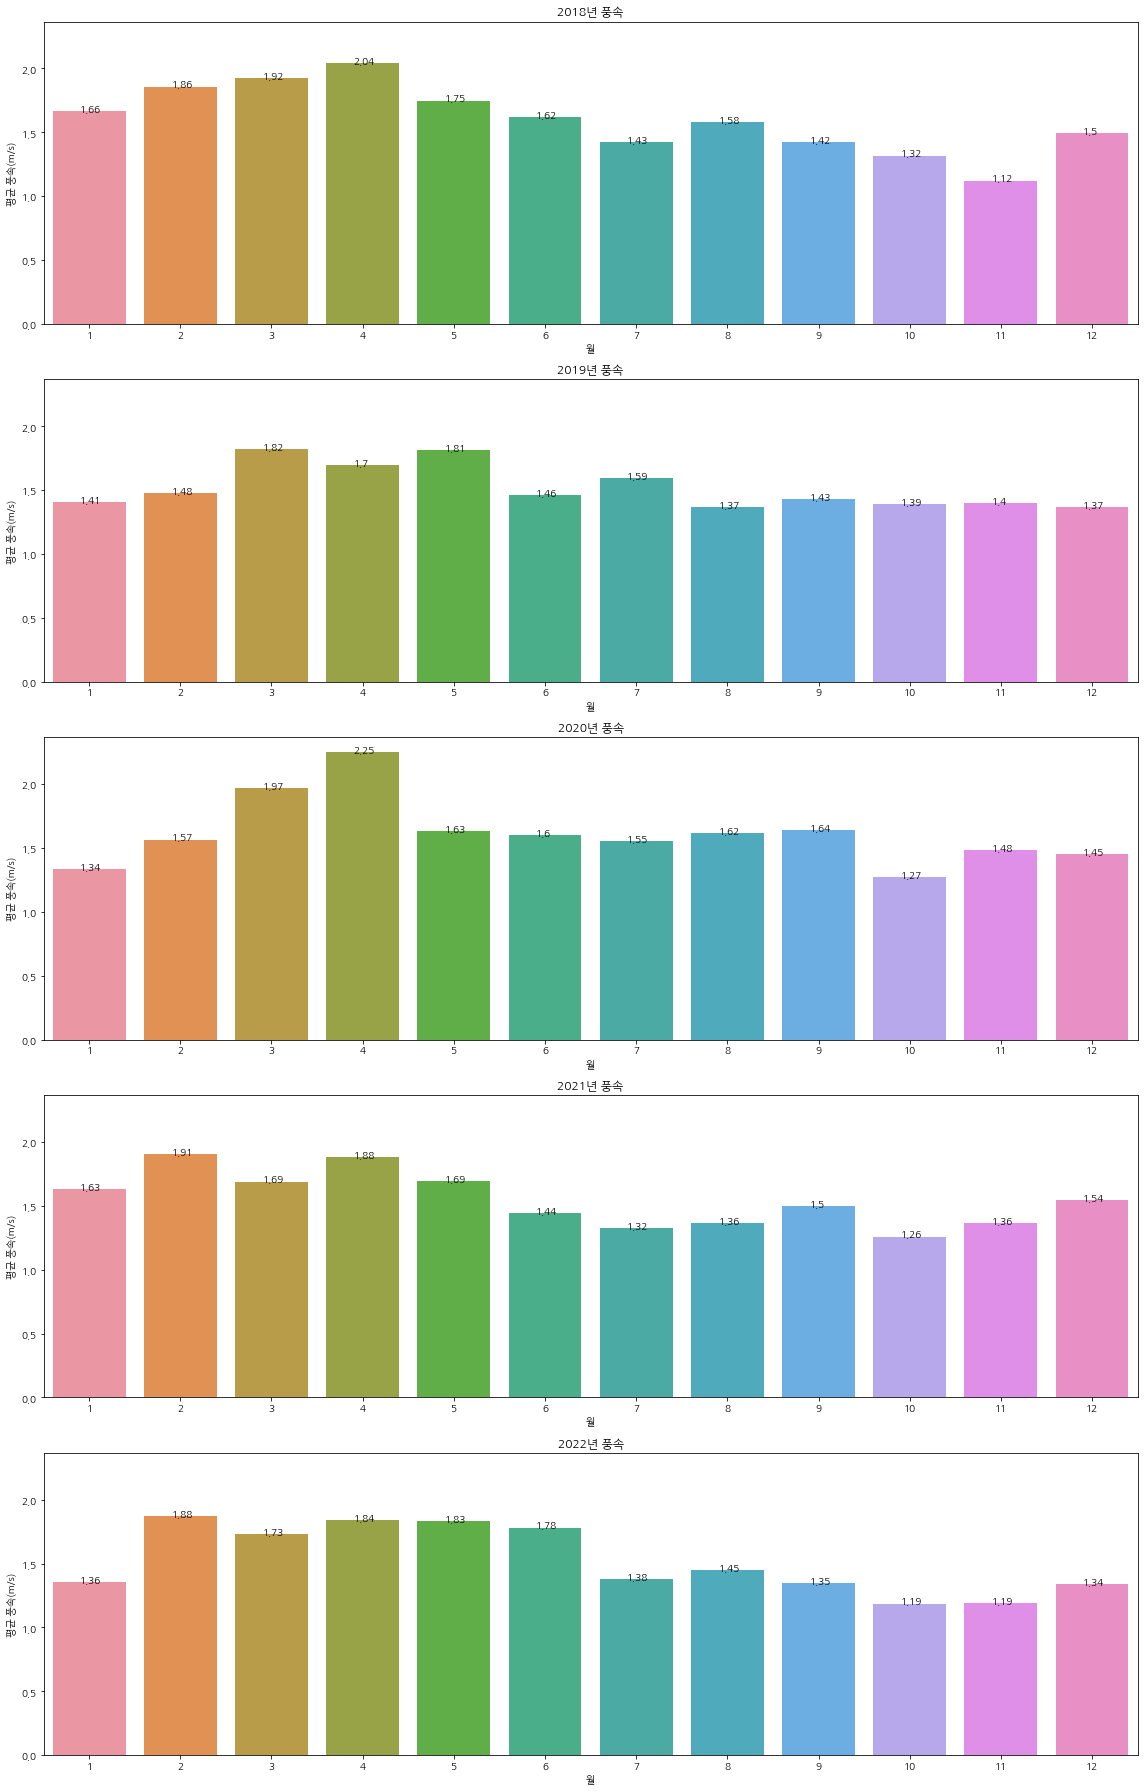

In [150]:
sub_df = df[df['평균 풍속(m/s)']>-1].groupby(['년도','월'],as_index=False)['평균 풍속(m/s)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 풍속(m/s)',ax=axes[i]).set(title=f'{y}년 풍속')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 풍속(m/s)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

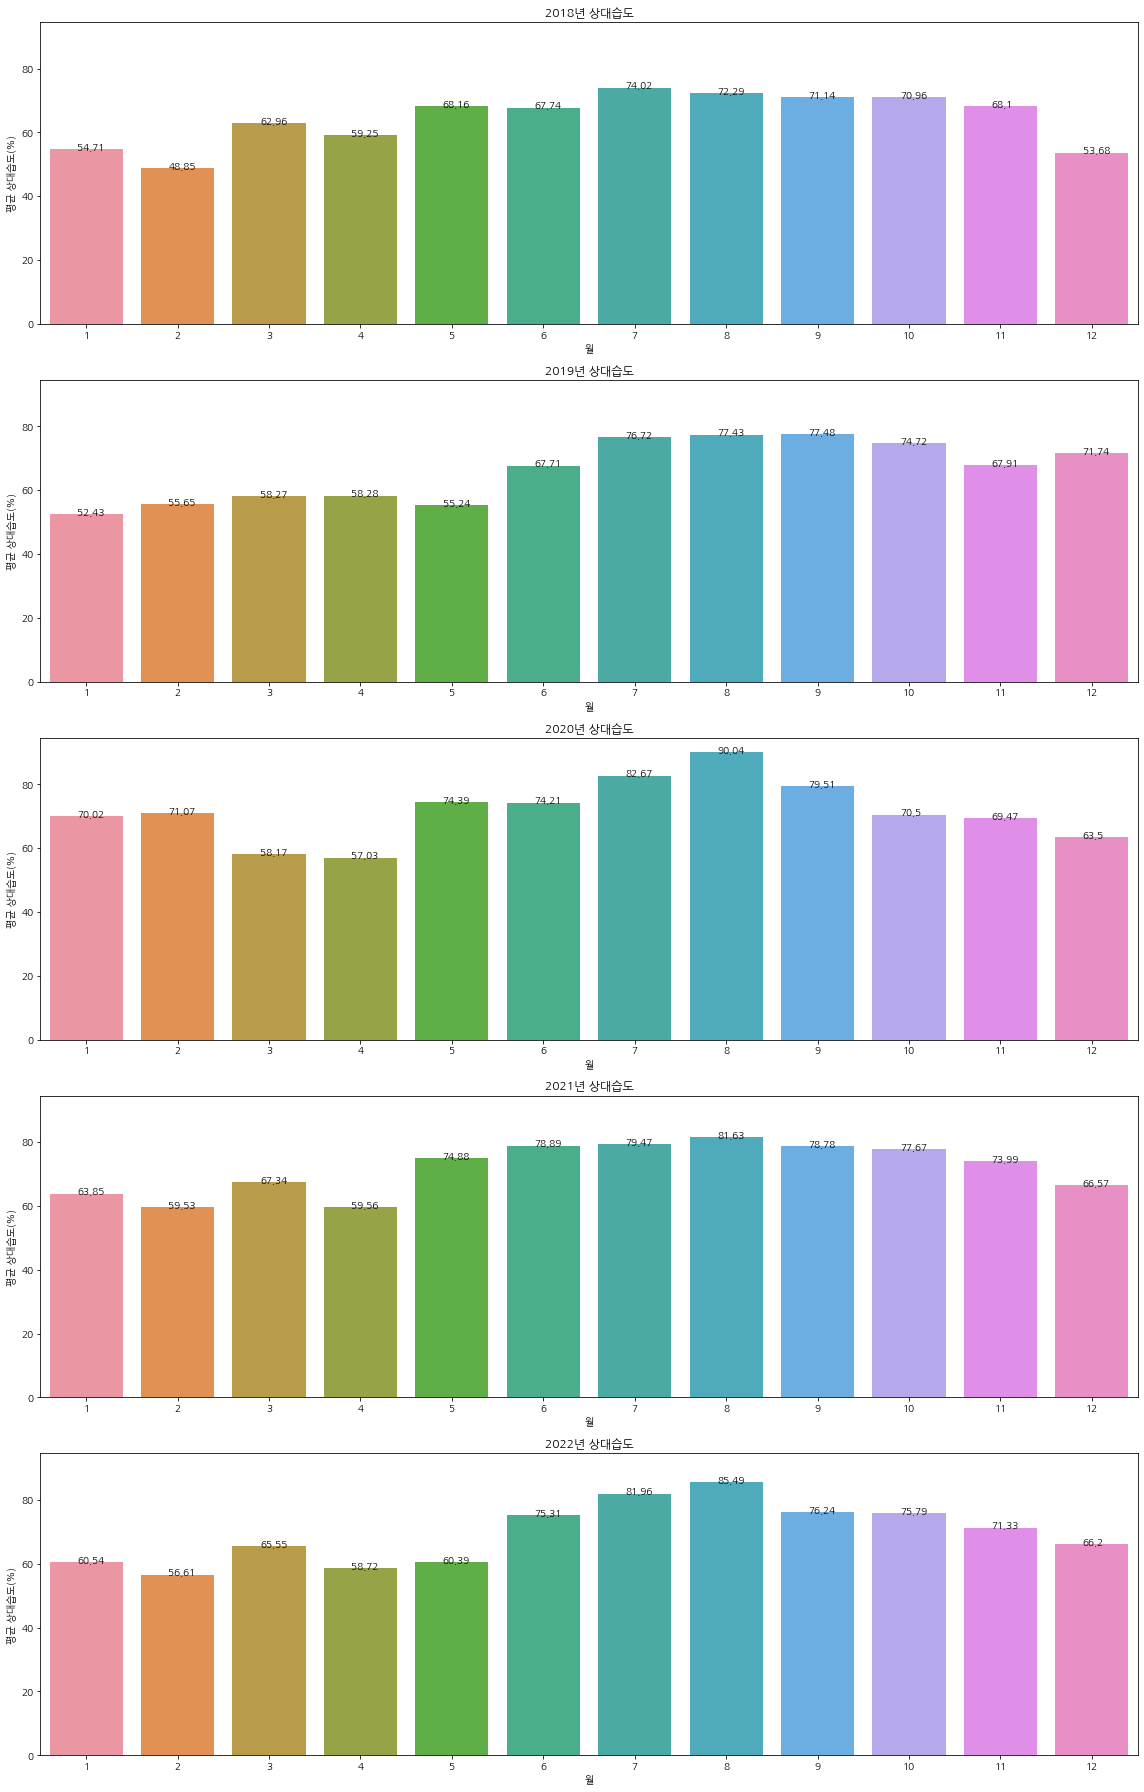

In [151]:
sub_df = df[df['평균 상대습도(%)']>-1].groupby(['년도','월'],as_index=False)['평균 상대습도(%)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 상대습도(%)',ax=axes[i]).set(title=f'{y}년 상대습도')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 상대습도(%)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

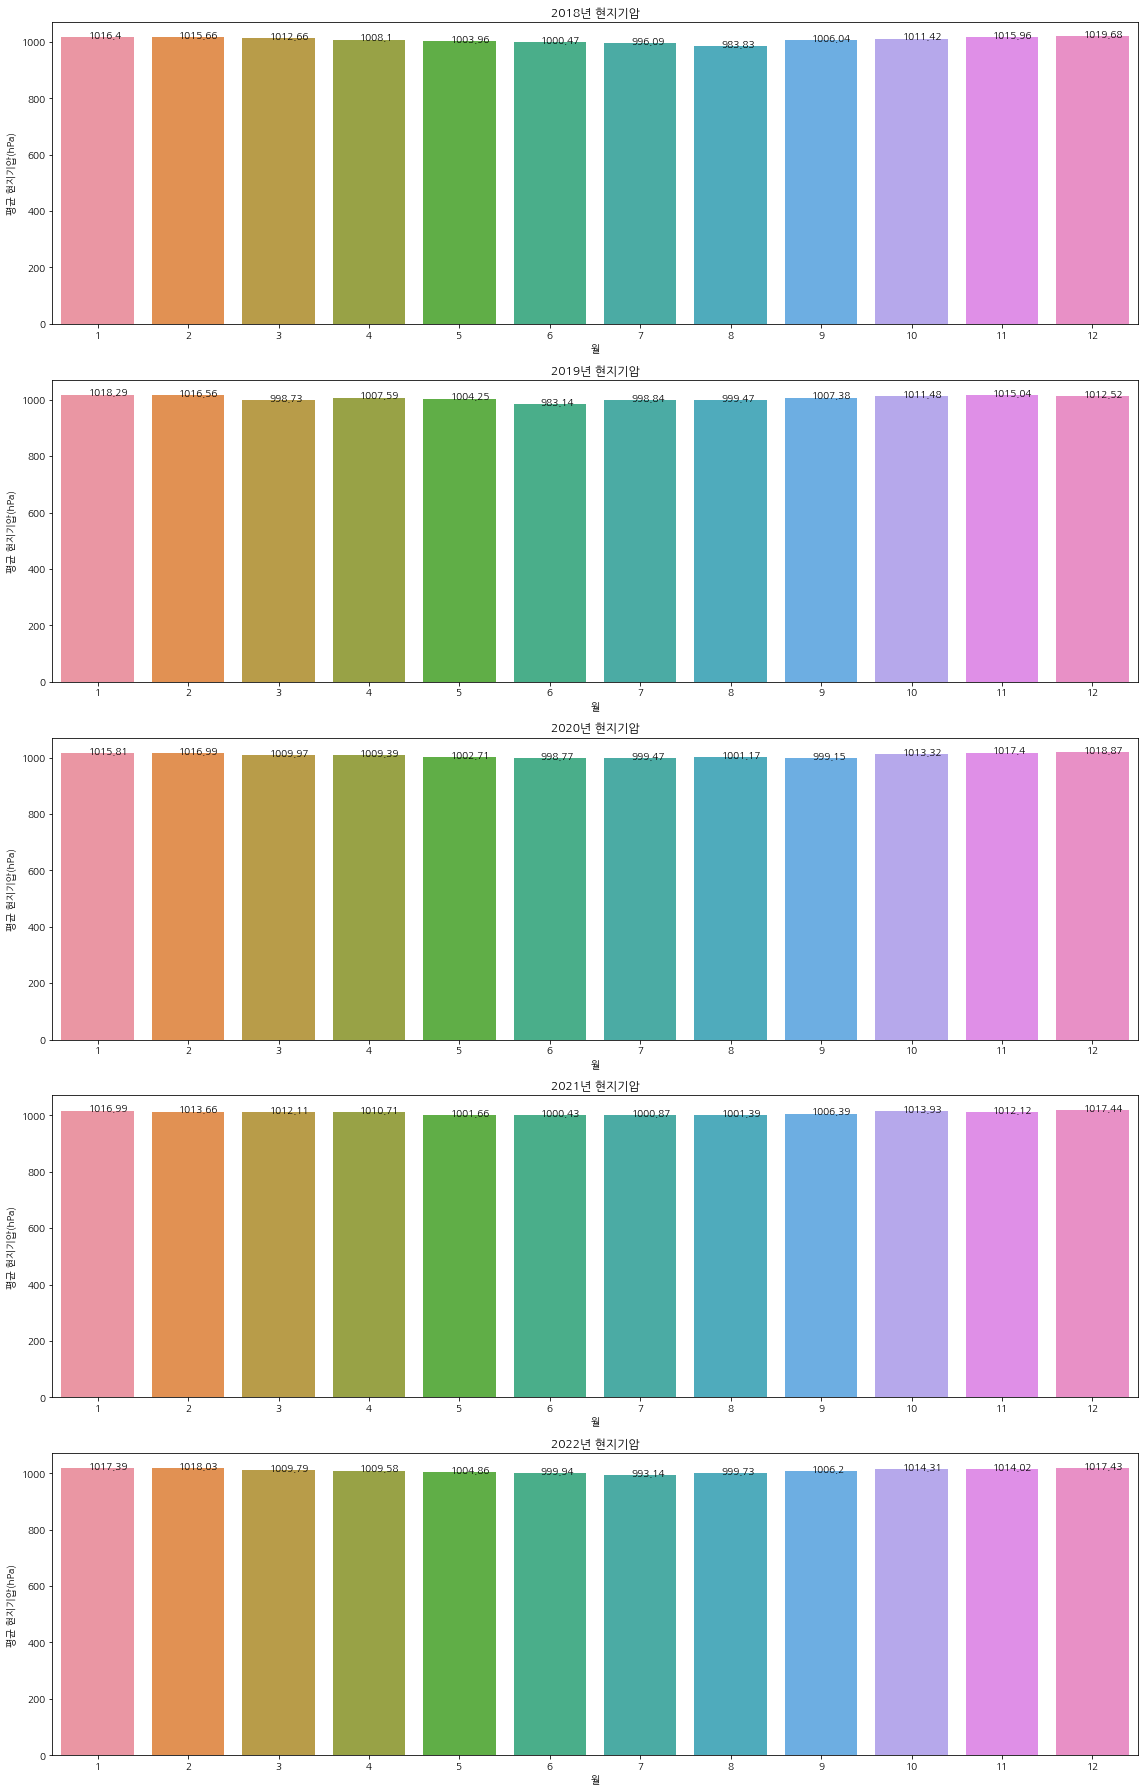

In [153]:
sub_df = df[df['평균 현지기압(hPa)']>-1].groupby(['년도','월'],as_index=False)['평균 현지기압(hPa)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 현지기압(hPa)',ax=axes[i]).set(title=f'{y}년 현지기압')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 현지기압(hPa)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

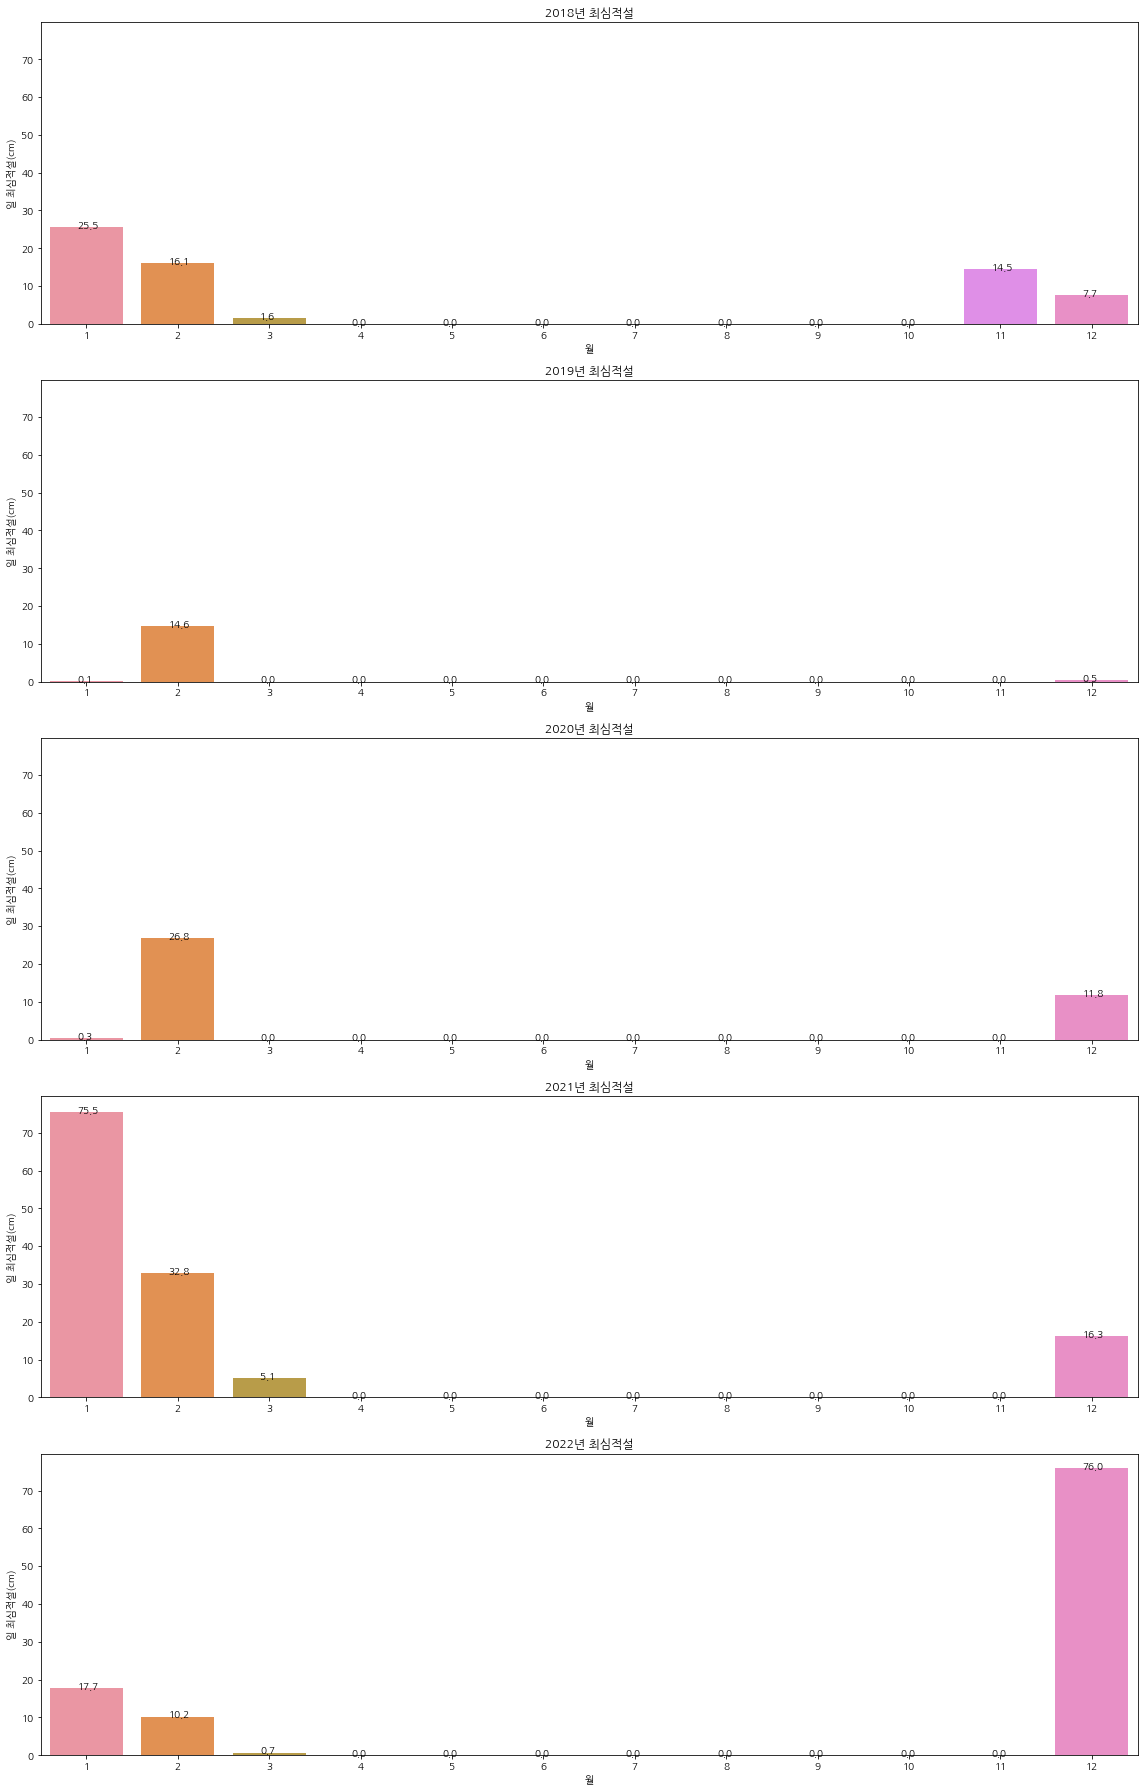

In [132]:
sub_df = df[df['일 최심적설(cm)']>-1].groupby(['년도','월'],as_index=False)['일 최심적설(cm)'].sum()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='일 최심적설(cm)',ax=axes[i]).set(title=f'{y}년 최심적설')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['일 최심적설(cm)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

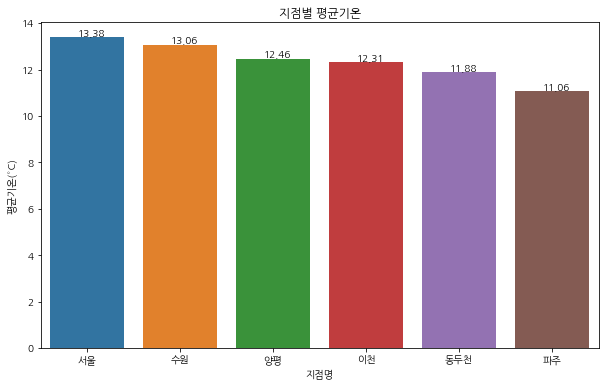

In [146]:
sub_df = df[df['평균기온(°C)']>-273].groupby(['지점명'],as_index=False)['평균기온(°C)'].mean().sort_values('평균기온(°C)',ascending=False)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=sub_df,x='지점명',y='평균기온(°C)').set(title=f'지점별 평균기온')
for j in range(len(sub_df)):
    h = ax.patches[j].get_height()
    x = ax.patches[j].get_x()
    v = sub_df['평균기온(°C)'].values[j]
    ax.annotate(str(round(v,2)),(x*1+0.3, h+0.1))

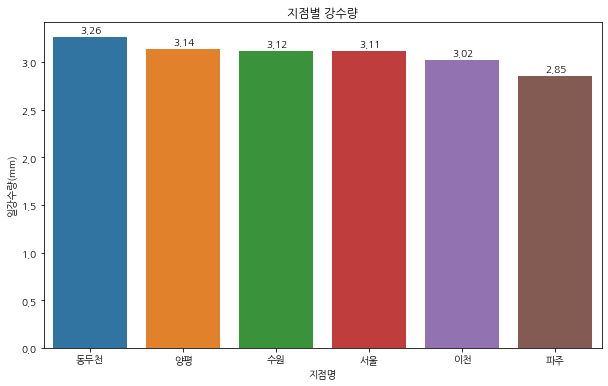

In [149]:
sub_df = df[df['일강수량(mm)']>-273].groupby(['지점명'],as_index=False)['일강수량(mm)'].mean().sort_values('일강수량(mm)',ascending=False)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=sub_df,x='지점명',y='일강수량(mm)').set(title=f'지점별 강수량')
for j in range(len(sub_df)):
    h = ax.patches[j].get_height()
    x = ax.patches[j].get_x()
    v = sub_df['일강수량(mm)'].values[j]
    ax.annotate(str(round(v,2)),(x*1+0.3, h+0.05))

**각 년도의 월별 평균 기온은?**

- 가장 기온이 높은 여름에 26-27도 정도이고, 가장 낮은 겨울에 -4 ~ -1정도이다.

**각 년도의 월별 최고기온과 최저기온은?**

- 여름에 최저 19도, 최대 36도 정도이고 겨울에 최저 -20도, 최대 10도 정도이다.

- 겨울이 여름보다 최고기온과 최저기온차가 더 크다.

**각 년도의 월별 강수량은?**

- 장마철에 강수량이 집중되는 형태이고, 해가 지날수록 강수량이 늘어나는 추세다.

**각 년도의 월별 평균 일사량은?**

- 2018년에는 초여름에 일사량이 많았으나, 2022년으로 가면서 4-5월 일사량이 크게 늘었다.

- 또한 전체적인 일사량도 해가 지날수록 증가하는 추세다.

**각 년도의 월별 평균 풍속은?**

- 봄과 여름에 풍속이 높은 편이다.

**각 년도의 월별 평균 상대습도는?**

- 주로 여름에 습도가 높고, 해가 지날수록 습도가 높아지는 추세다.

**각 년도의 월별 평균 현지기압은?**

- 여름에 낮아지고, 겨울에 높아진다.

**각 년도의 월별 최심적설은?**

- 대부분 12월-2월에 집중되어 있고, 3월과 11월에도 측정된다.

**지점별 평균 기온?**

- 서울이 가장 높고, 파주가 가장 낮다.

**지점별 평균 강수량?**

- 동두천이 가장 많고, 파주가 가장 적다.